# hw7

In [104]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

data = pd.read_csv('./hw7/iris_imbalanced.csv',header='infer')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
for i in data.Name.values:
    if i == 'Iris-setosa':
        data.Name.replace(i,0,inplace=True)
    elif i == 'Iris-virginica':
        data.Name.replace(i,1,inplace=True)
    elif i == 'Iris-versicolor':
        data.Name.replace(i,2,inplace=True)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [106]:
#pd.crosstab([data['SepalLength'],data['SepalWidth']],data['Name'])

In [116]:
from sklearn import tree

X_train,X_test,Y_train,Y_test = train_test_split(data.drop('Name',axis=1),data['Name'],test_size=0.3,random_state=1124)

print('train',X_train.shape,Y_train.shape)
print('test',X_test.shape,Y_test.shape)

train (245, 4) (245,)
test (105, 4) (105,)


In [108]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
# 학습
clf.fit(X_train,Y_train)
# 검증
prediction = clf.predict(X_test)

In [114]:
score = cross_val_score(clf,X_train,Y_train,cv=10,scoring='accuracy')
print('acc',accuracy_score(Y_test,prediction))
print(score.mean())

acc 0.9886363636363636
0.980911680911681


In [ ]:
for i in range(10):
    classfier = 
    

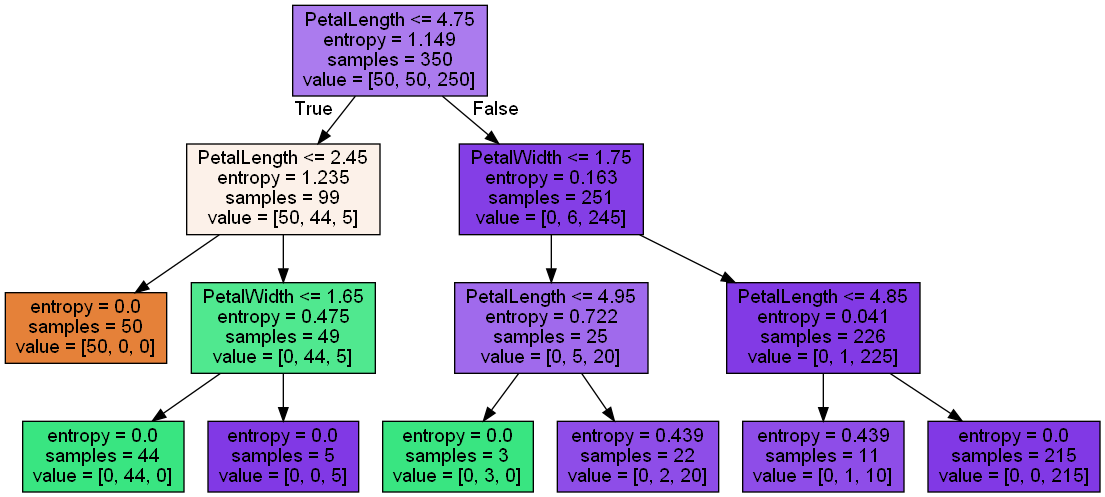

In [26]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf,feature_names=X.columns,filled=True,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())